In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import geopandas


# a)Data input

In [125]:
df_gas = pd.read_csv('Project/TotalHouseholdTownGasConsumptionbyDwellingType2005toJun2021.csv') #hdb gas consumtion
df_gm = pd.read_csv('Project/ListingofBuildingEnergyPerformanceData2020.csv') #building with green mark
dg_gm = geopandas.read_file('Project/GreenMarkBuildingsGEOJSON.geojson') #green mark building location
dg_ec = geopandas.read_file('Project/AverageMonthlyHouseholdElectricityConsumptionbyURAPlanningAreaDwellingType2009.geojson')#hdb energy consumption
df_sp = pd.read_csv('Project/SolarPVInstallationsbyURAPlanningRegion.csv')

# b)loc function


In [8]:
pd.set_option('display.max_columns', None)
df_gas.head()

,month,housing_type,dwelling_type,tg_consumption_gwh
0,2005-01,Public Housing,1-Room / 2-Room,1.1
1,2005-01,Public Housing,3-Room,6.6
2,2005-01,Public Housing,4-Room,16.0
3,2005-01,Public Housing,5-Room and Executive,17.4
4,2005-01,Private Housing,Private Apartments and Condominiums,5.9


In [9]:
print(df_gas['dwelling_type'].unique())

['1-Room / 2-Room' '3-Room' '4-Room' '5-Room and Executive'
 'Private Apartments and Condominiums' 'Landed Properties' 'Others']


In [10]:
df_gas.loc[df_gas['housing_type']=='Public Housing',['housing_type','tg_consumption_gwh']].describe()
#summary stat of gas consumption in public housing

,tg_consumption_gwh
count,784.000000
mean,10.865306
std,7.453757
min,1.000000
25%,4.875000
50%,12.550000
75%,17.900000
max,31.100000


In [18]:
df_gas.loc[df_gas['housing_type']=='Private Housing',['housing_type','tg_consumption_gwh']].describe()
#summary stat of gas consumption in private housing

,tg_consumption_gwh
count,392.000000
mean,6.139796
std,5.950611
min,0.900000
25%,0.900000
50%,3.550000
75%,10.500000
max,23.600000


In [22]:
df_gas['year'] = df_gas['month'].str.slice(0, 4)
df_gas.loc[df_gas['year']=='2005',['year','tg_consumption_gwh']].describe()
#summary stat of gas consumption in 2005

,tg_consumption_gwh
count,84.000000
mean,6.859524
std,6.576979
min,0.500000
25%,1.000000
50%,6.000000
75%,15.625000
max,17.700000


# c) tables


In [23]:
df_gas.groupby('dwelling_type')['tg_consumption_gwh'].describe()
#summary stat of gas consumption for each dwelling type

,count,mean,std,min,25%,50%,75%,max
dwelling_type,,,,,,,,
1-Room / 2-Room,196.0,1.234184,0.227596,1.0,1.000,1.1,1.400,2.1
3-Room,196.0,6.234694,0.426218,5.8,6.000,6.2,6.300,9.9
4-Room,196.0,17.621429,1.900054,15.2,16.400,17.4,18.400,31.1
5-Room and Executive,196.0,18.370918,1.398542,16.6,17.700,18.2,18.725,30.1
Landed Properties,196.0,0.951531,0.077444,0.9,0.900,0.9,1.000,1.4
Others,196.0,0.748469,0.509245,0.1,0.200,1.0,1.200,1.4
Private Apartments and Condominiums,196.0,11.328061,4.108874,5.7,7.975,10.5,14.225,23.6


In [24]:
df_gm.groupby('greenmarkrating')['2020'].describe()
#summary stat of energy performance in 2020 for each green mark rating
#How ever this doesnt show much since the diffrence between each building's gfa within every group can be huge

,count,mean,std,min,25%,50%,75%,max
greenmarkrating,,,,,,,,
Certified,26.0,228.251923,166.915269,51.40,123.6425,192.710,261.9200,752.78
Gold,83.0,242.783253,152.925206,37.41,141.5100,200.660,291.9500,822.63
GoldPlus,60.0,258.098667,142.944963,62.69,159.1350,214.340,306.6175,712.95
Legislated,22.0,248.104091,168.743369,27.14,120.0375,220.425,341.5100,684.22
Platinum,126.0,212.362063,141.753956,19.96,127.7425,172.375,261.8075,1157.40


In [27]:
df_gm['gfa'] = df_gm['grossfloorarea'].str.replace(',', '').astype(int)
#since original data is considered as string, hv to convert into integer
df_gm.groupby('greenmarkrating')['gfa'].describe()
#Summary stat of the gross floor area for each rating

,count,mean,std,min,25%,50%,75%,max
greenmarkrating,,,,,,,,
Certified,26.0,41365.115385,85763.740684,5901.0,15293.25,19099.0,33940.75,452045.0
Gold,83.0,41279.240964,60740.572002,5000.0,13546.00,26417.0,45193.50,490516.0
GoldPlus,60.0,41239.183333,33850.351508,5030.0,19421.00,30941.5,52581.75,170856.0
Legislated,22.0,30226.000000,82492.008346,757.0,3305.25,7591.5,13627.50,383038.0
Platinum,126.0,60721.761905,77781.618321,6407.0,21190.00,35968.5,70430.50,581511.0


# d)graphs


In [25]:
df_sp.head()

,year,ura_planning_region,residential_status,num_solar_pv_inst,inst_cap_kwac,total_inst_cap_percent
0,2008,Central,Non-Residential,4,73.2,30.0
1,2008,Central,Residential,4,19.9,10.0
2,2008,East,Non-Residential,1,2.3,0.0
3,2008,East,Residential,1,6.6,0.0
4,2008,North-East,Non-Residential,10,65.3,20.0


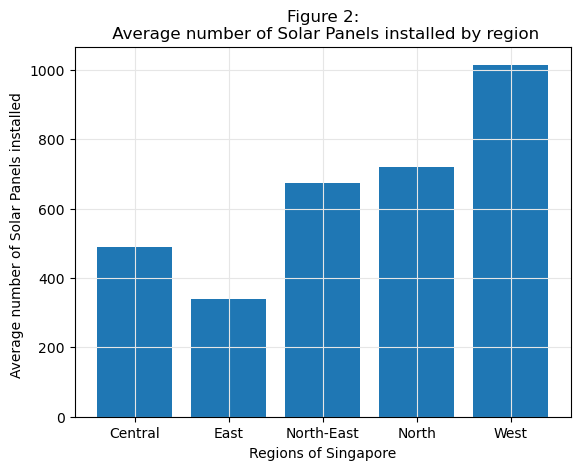

In [93]:
fig, ax = plt.subplots()
dg_sp = df_sp.groupby('year').mean(numeric_only=True)
plt.bar(df_sp['ura_planning_region'],df_sp['num_solar_pv_inst'])
plt.title('Figure 1:\n Average number of Solar Panels installed by region')
plt.xlabel('Regions of Singapore')
plt.ylabel('Average number of Solar Panels installed ')
plt.grid(color=(.9,.9,.9))
fig.savefig('Figures/Figure 1.png')

In [126]:
df_gm.head()

,buildingname,buildingaddress,buildingtype,greenmarkstatus,greenmarkrating,greenmarkyearaward,buildingsize,grossfloorarea,2017energyuseintensity,2018energyusintensity,voluntarydisclosure
0,HEXACUBE,"160 CHANGI ROAD, SINGAPORE 419728",Mixed Development,No,NaN,NaN,Small,"5,036",81.0,105.0,Y
1,NaN,NaN,Retail,No,NaN,NaN,Small,NaN,475.0,402.0,N
2,CITY SQUARE MALL,"180 KITCHENER ROAD, SINGAPORE 208539",Retail,Yes,Platinum,2018.0,Large,"65,640",382.0,365.0,Y
3,REPUBLIC PLAZA,"9 RAFFLES PLACE, SINGAPORE 048619",Office,Yes,Platinum,2018.0,Large,"102,356",212.0,183.0,Y
4,CENTRAL MALL,"1 MAGAZINE ROAD, SINGAPORE 059567",Office,Yes,Platinum,2017.0,Large,"15,769",203.0,181.0,Y


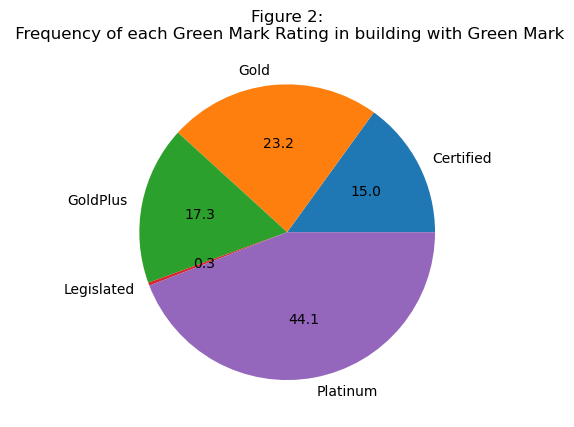

In [246]:
fig, ax = plt.subplots(1,1)
dg = df_gm.groupby('greenmarkrating').count()

plt.pie(dg['greenmarkstatus'],autopct='%.1f',labels=dg.index)

plt.title('Figure 2:\n Frequency of each Green Mark Rating in building with Green Mark')
plt.grid(color=(.9,.9,.9))
fig.savefig('Figures/Figure 2png')

In [194]:
df_gas = pd.read_csv('Project/TotalHouseholdTownGasConsumptionbyDwellingType2005toJun2021.csv', parse_dates=['month'])

df_gas.head()

,month,housing_type,dwelling_type,tg_consumption_gwh
0,2005-01-01,Public Housing,1-Room / 2-Room,1.1
1,2005-01-01,Public Housing,3-Room,6.6
2,2005-01-01,Public Housing,4-Room,16.0
3,2005-01-01,Public Housing,5-Room and Executive,17.4
4,2005-01-01,Private Housing,Private Apartments and Condominiums,5.9


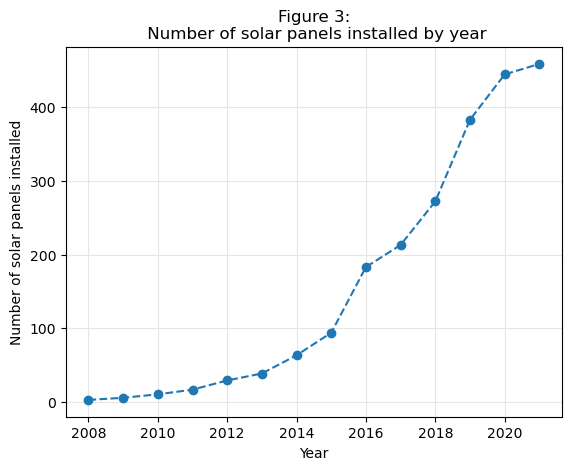

In [206]:
fig, ax = plt.subplots(1,1)
dg_sp = df_sp.groupby('year').mean(numeric_only=True)
plt.plot(dg_sp['num_solar_pv_inst'],linestyle='dashed',marker='o',markersize=6)
plt.title('Figure 3:\n Number of solar panels installed by year')
plt.xlabel('Year')
plt.ylabel('Number of solar panels installed')
plt.grid(color=(.9,.9,.9))
fig.savefig('Figures/Figure 3.png')

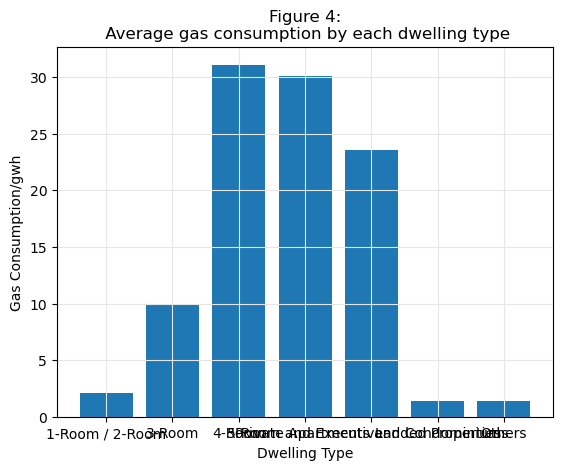

In [213]:
fig, ax = plt.subplots(1,1)
dg_gas = df_gas.groupby('month').mean(numeric_only=True)
plt.bar(df_gas['dwelling_type'],df_gas['tg_consumption_gwh'])
plt.title('Figure 4:\n Average gas consumption by each dwelling type')
plt.xlabel('Dwelling Type')
plt.ylabel('Gas Consumption/gwh')
plt.grid(color=(.9,.9,.9))
fig.savefig('Figures/Figure 4.png')

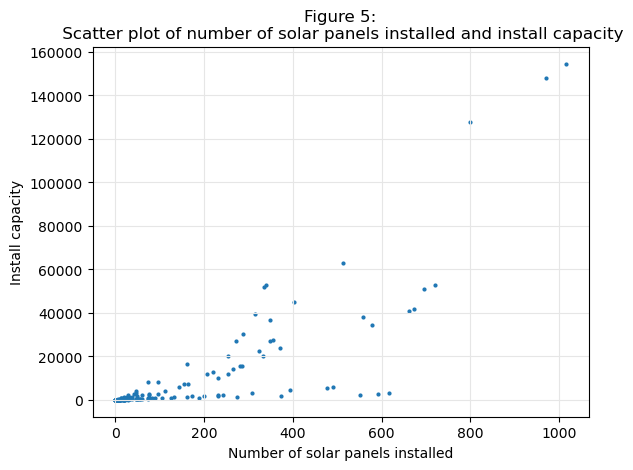

In [217]:
fig, ax = plt.subplots(1,1)

plt.scatter(df_sp['num_solar_pv_inst'], df_sp['inst_cap_kwac'],s=4, label = 'Data')

plt.title('Figure 5:\n Scatter plot of number of solar panels installed and install capacity')
plt.xlabel('Number of solar panels installed')
plt.ylabel('Install capacity')
plt.grid(color=(.9,.9,.9))
fig.savefig('Figures/Figure 5.png')

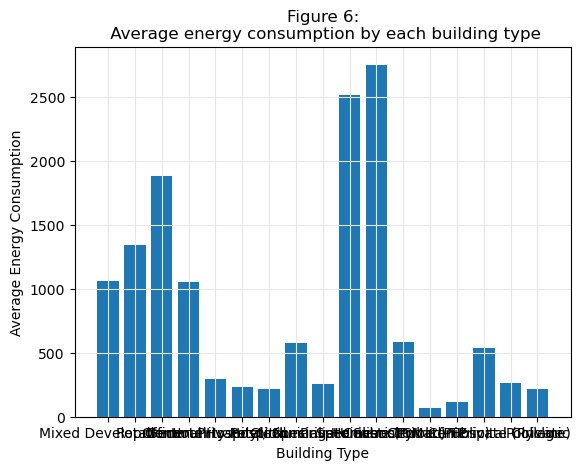

In [248]:
fig, ax = plt.subplots(1,1)

plt.bar(df_gm['buildingtype'],df_gm['2018energyusintensity'])
plt.title('Figure 6:\n Average energy consumption by each building type')
plt.xlabel('Building Type')
plt.ylabel('Average Energy Consumption')
plt.grid(color=(.9,.9,.9))
fig.savefig('Figures/Figure 6png')